In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model_A(x,params):
    y=params[0]+params[1]*x+params[2]*x**2
    return y
def model_B(x,params):
    y=params[0]*np.exp(-0.5*(x-params[1])**2/params[2]**2)
    return y
def model_C(x,params):
    y=params[0]*np.exp(-0.5*(x-params[1])**2/params[2]**2)
    y+=params[0]*np.exp(-0.5*(x-params[3])**2/params[4]**2)
    return y

In [3]:
def loglike_A(x_obs, y_obs, sigma_y_obs, betas):
    n_obs = len(y_obs)
    l = 0.0
    for i in range(n_obs):
        l += -0.5*(y_obs[i]-model_A(x_obs[i,:], betas))**2/sigma_y_obs[i]**2
    return l
def loglike_B(x_obs, y_obs, sigma_y_obs, betas):
    n_obs = len(y_obs)
    l = 0.0
    for i in range(n_obs):
        l += -0.5*(y_obs[i]-model_B(x_obs[i,:], betas))**2/sigma_y_obs[i]**2
    return l
def loglike_C(x_obs, y_obs, sigma_y_obs, betas):
    n_obs = len(y_obs)
    l = 0.0
    for i in range(n_obs):
        l += -0.5*(y_obs[i]-model_B(x_obs[i,:], betas))**2/sigma_y_obs[i]**2
    return l

In [52]:
def run_mcmc_A(data_file="data_to_fit.txt", n_dim=2, n_iterations=20000):
    data = np.loadtxt(data_file)
    x_obs = data[:,:n_dim-1]
    y_obs = data[:, n_dim-1]
    sigma_y_obs =  data[:, n_dim]
    betas = np.zeros([n_iterations, n_dim+1])
    for i in range(1, n_iterations):
        current_betas = betas[i-1,:]
        next_betas = current_betas + np.random.normal(scale=0.01, size=n_dim+1)

        loglike_current = loglike_A(x_obs, y_obs, sigma_y_obs, current_betas)
        loglike_next = loglike_A(x_obs, y_obs, sigma_y_obs, next_betas)

        r = np.min([np.exp(loglike_next - loglike_current), 1.0])
        alpha = np.random.random()

        if alpha < r:
            betas[i,:] = next_betas
        else:
            betas[i,:] = current_betas
    betas = betas[n_iterations//2:,:]
    return {'betas':betas, 'x_obs':x_obs, 'y_obs':y_obs}
n_dim = [2,2,4]
#n_dim = 2
results_A = run_mcmc_A()
betas_A = results_A['betas']

In [53]:
def run_mcmc_B(data_file="data_to_fit.txt", n_dim=2, n_iterations=20000):
    data = np.loadtxt(data_file)
    x_obs = data[:,:n_dim-1]
    y_obs = data[:, n_dim-1]
    sigma_y_obs =  data[:, n_dim]
    betas = np.zeros([n_iterations, n_dim+1])
    for i in range(1, n_iterations):
        current_betas = betas[i-1,:]
        next_betas = current_betas + np.random.normal(scale=0.01, size=n_dim+1)

        loglike_current = loglike_B(x_obs, y_obs, sigma_y_obs, current_betas)
        loglike_next = loglike_B(x_obs, y_obs, sigma_y_obs, next_betas)

        r = np.min([np.exp(loglike_next - loglike_current), 1.0])
        alpha = np.random.random()

        if alpha < r:
            betas[i,:] = next_betas
        else:
            betas[i,:] = current_betas
    betas = betas[n_iterations//2:,:]
    return {'betas':betas, 'x_obs':x_obs, 'y_obs':y_obs}

results_B = run_mcmc_B()
betas_B = results_B['betas']

/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [67]:
def run_mcmc_C(data_file="data_to_fit.txt", n_dim=4, n_iterations=20000):
    data = np.loadtxt(data_file)
    x_obs = data[:,:len(data[0])-1]
    y_obs = data[:,len(data[0])-1]
    sigma_y_obs =  data[:,len(data[0])-1]
    betas = np.zeros([n_iterations, n_dim+1])
    for i in range(1, n_iterations):
        current_betas = betas[i-1,:]
        next_betas = current_betas + np.random.normal(scale=0.01, size=n_dim+1)

        loglike_current = loglike_C(x_obs, y_obs, sigma_y_obs, current_betas)
        loglike_next = loglike_C(x_obs, y_obs, sigma_y_obs, next_betas)
        r=0
  #      r = np.min([np.exp(loglike_next - loglike_current), 1.0])
        alpha = np.random.random()

        if alpha < r:
            betas[i,:] = next_betas
        else:
            betas[i,:] = current_betas
    betas = betas[n_iterations//2:,:]
    return {'betas':betas, 'x_obs':x_obs, 'y_obs':y_obs}


results_C = run_mcmc_C()
betas_C = results_C['betas']

/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


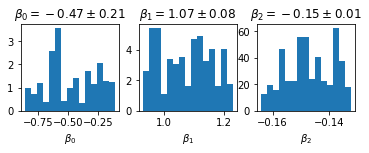

In [68]:
mean_A=np.zeros(n_dim[0]+1)
std_A=np.zeros(n_dim[0]+1)
plt.figure()
for i in range(0,n_dim[0]+1):
    mean_A[i]=np.mean(betas_A[:,i])
    std_A[i]=np.std(betas_A[:,i])
    plt.subplot(2,3,i+1)
    plt.hist(betas_A[:,i],bins=15, density=True)
    plt.title(r"$\beta_{}= {:.2f}\pm {:.2f}$".format(i,np.mean(betas_A[:,i]), np.std(betas_A[:,i])))
    plt.xlabel(r"$\beta_{}$".format(i))
plt.subplots_adjust(hspace=0.5)
plt.savefig("ajuste_bayes_mcmc.png",  bbox_inches='tight')    

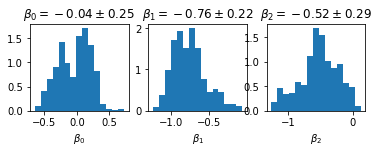

In [57]:
mean_B=np.zeros(n_dim[1]+1)
std_B=np.zeros(n_dim[1]+1)
plt.figure()
for i in range(0,n_dim[1]+1):
    mean_B=np.mean(betas_B[:,i])
    std_B=np.std(betas_B[:,i])
    plt.subplot(2,3,i+1)
    plt.hist(betas_B[:,i],bins=15, density=True)
    plt.title(r"$\beta_{}= {:.2f}\pm {:.2f}$".format(i,np.mean(betas_B[:,i]), np.std(betas_B[:,i])))
    plt.xlabel(r"$\beta_{}$".format(i))
plt.subplots_adjust(hspace=0.5)
plt.savefig("ajuste_bayes_mcmc.png",  bbox_inches='tight')

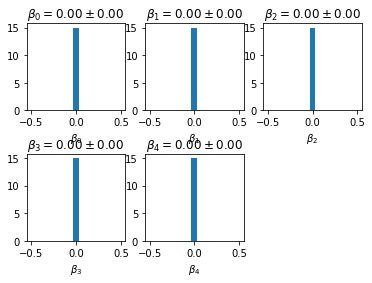

In [69]:
mean_C=np.zeros(n_dim[2]+1)
std_C=np.zeros(n_dim[2]+1)
plt.figure()
for i in range(0,n_dim[2]+1):
    mean_C=np.mean(betas_C[:,i])
    std_C=np.std(betas_C[:,i])
    plt.subplot(2,3,i+1)
    plt.hist(betas_C[:,i],bins=15, density=True)
    plt.title(r"$\beta_{}= {:.2f}\pm {:.2f}$".format(i,np.mean(betas_C[:,i]), np.std(betas_C[:,i])))
    plt.xlabel(r"$\beta_{}$".format(i))
plt.subplots_adjust(hspace=0.5)
plt.savefig("ajuste_bayes_mcmc.png",  bbox_inches='tight')

In [59]:
#mejor ajuste

In [61]:
data=np.loadtxt("data_to_fit.txt")
x_obs = data[:,:len(data[0])-1]
y_obs = data[:,len(data[0])-1]
sigma_y_obs =  data[:,len(data[0])-1]


In [74]:
k=3
def P(M):
    return 1
def maximo_incertidumbre(x, y):
    deltax = x[1] - x[0]
    # maximo de y
    ii = np.argmax(y)
    # segunda derivada
    d = (y[ii+1] - 2*y[ii] + y[ii-1]) / (deltax**2)
    return x[ii], 1.0/np.sqrt(-d)
#maximo_incertidumbre(x_obs[:,0], loglike_A(x_obs, y_obs, sigma_y_obs, betas_A))
def P_M_D(x_obs, y_obs, sigma_y_obs, betas,k):
    BIC=2*(-loglike_A(x_obs, y_obs, sigma_y_obs, betas)+k*np.log(n)/2)
    return np.exp(-BIC/2)*P(M)
